# Daniel Krasnov

## Research question/interestsDoes where you are in the world (country/city/longitude and latitude) affect the quality of food available to you (based on rating column), the price (based on average price for two column), and the type of food (based on cuisine column)?

## Task 1 EDA

In [426]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Read in data
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

In [371]:
#Inital preview of ZomatoCSV
print(zomatoCSV.info())
zomatoCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [372]:
#Inital Preview of countryCodesCSV
print(countryCodesCSV.info())
countryCodesCSV.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Preview looks good! It seems like we have a table of 9551 entries with all our restaurant data and a table with countries. To get a sense of any null values I use visualizations adapted from [Handling Missing Data for a Beginner](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436)

In [373]:
zomatoCSV.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

Looks like there are missing values in Cuisnes. Generating a heatmap will give us a better sense of the damage.

<AxesSubplot:>

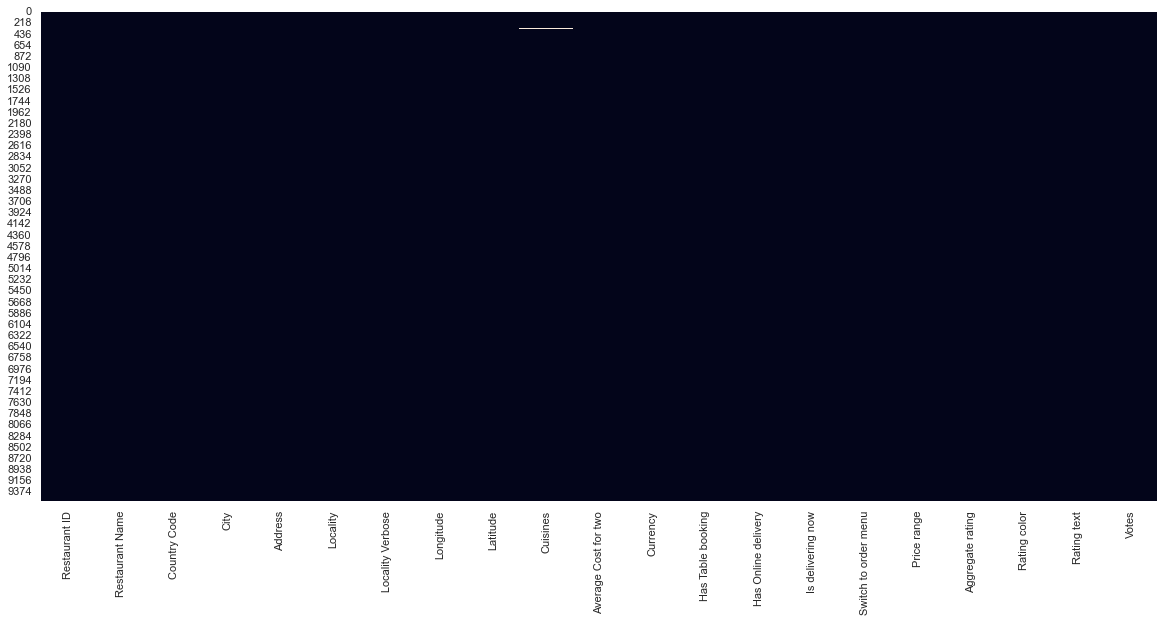

In [374]:
#Set window size
sns.set({'figure.figsize':(20,9)})
#Heatmap of null values
sns.heatmap(zomatoCSV.isnull(), cbar=False)

The impact of the missing data seems trival. Next we should check for duplicate data and drop rows with missing data

In [375]:
zomatoCSV = zomatoCSV[zomatoCSV.notnull()]

In [376]:
#Drop rows with missing values
zomatoCSV = zomatoCSV[zomatoCSV.notnull()]
#Double check for missing values
print(zomatoCSV.isna().any())
#Check for any duplicate values
print(zomatoCSV.duplicated().any())

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool
False


Overall, it looks like there is very few missing values and no duplicate data. With the rows of missing values delted we can move on with getting a better sense of the shape of our data.

In [377]:
print(zomatoCSV.nunique(axis='index'))
zomatoCSV.describe()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Everything looks fine however the unique cuisines seems far too high at first, calling unique() on it tells us that restaurants are using multiple cuisine categories to describe their food which makes sense.

In [378]:
pd.DataFrame(zomatoCSV.Cuisines.unique()).head()

,0
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"


Now I want to get a sense of some correltations within my dataset to see if my research question is a good fit. To do this I will need to attach the country codes csv and do some plots.

In [398]:
#Adding Country column from countryCodesCSV to zomatoCSV
zomatoCSV = pd.merge(zomatoCSV,countryCodesCSV, how = 'left', on='Country Code')
zomatoCSV.head()

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Country_x,Country_y
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,314,Phillipines,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,591,Phillipines,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,270,Phillipines,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,365,Phillipines,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,229,Phillipines,Phillipines


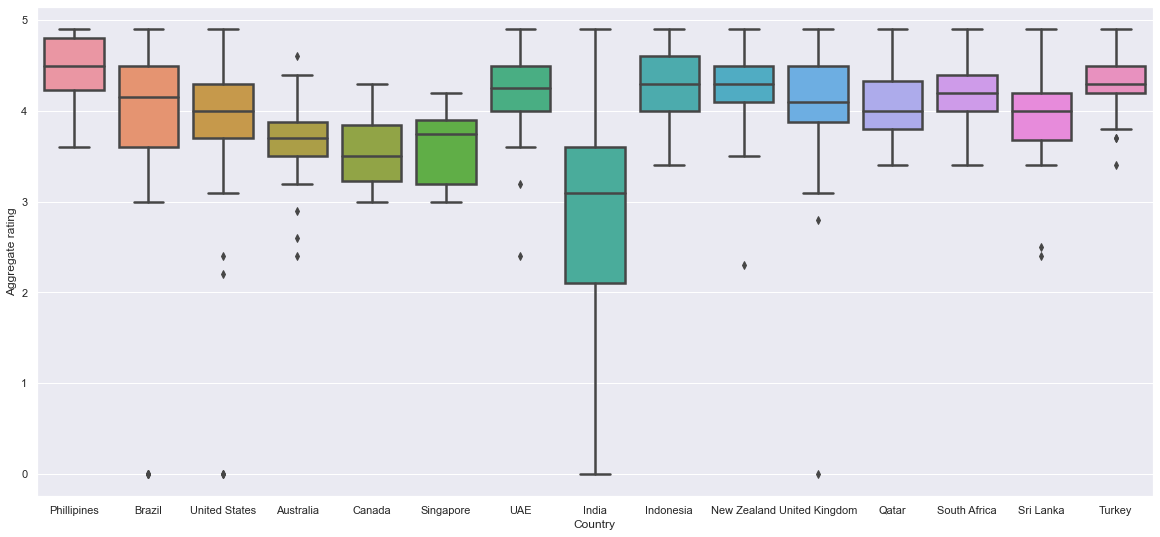

In [380]:
plot = sns.boxplot(x="Country", y="Aggregate rating", data=zomatoCSV, linewidth=2.5 )

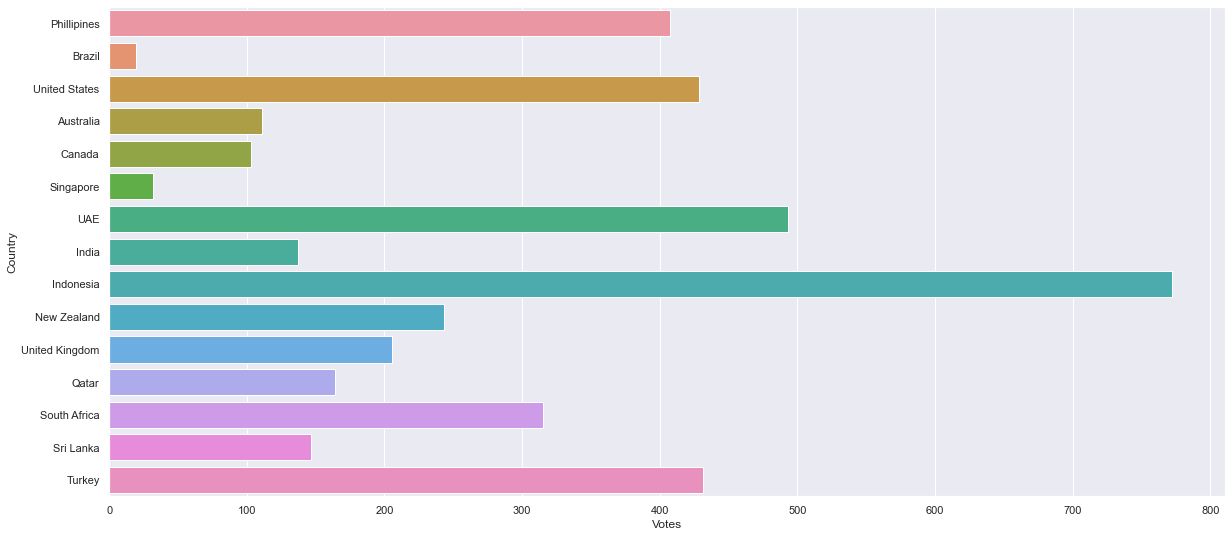

In [381]:
plot = sns.barplot(x="Votes", y="Country", data=zomatoCSV, ci=None)

The boxplot informs us of the mean ratings of restaurants across various countries. To make sure these aren't skewed I check the amount of votes recorded in each country in my bar graph. For the majority of the countires the sample size for votes is good however insights from countries like Brazil and Singapore will be less valuable becase of the low vote count. Overall we can say that what coutnry you're in does affect the average aggregate rating.

Next, it will be important to get a good sense of what kinds of cuisines are in the data however, they are listed in groups:

In [396]:
zomatoCSV.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

To see all the unique food type we can use a counter:

In [382]:
#Importing counter
from collections import Counter

#Getting a dictionary of the counts of each unique food type
zomatoCSV['Cuisines_split'] = zomatoCSV['Cuisines'].str.split(',')
seq = list((zomatoCSV.Cuisines_split.value_counts()).index)
dict = {key.strip(): value for key, value in Counter(x for xs in seq for x in set(xs)).items()}
dict

{'North Indian': 387,
 'Chinese': 116,
 'Fast Food': 233,
 'Mughlai': 19,
 'Cafe': 69,
 'Bakery': 67,
 'Desserts': 32,
 'Street Food': 103,
 'Pizza': 60,
 'Mithai': 61,
 'South Indian': 141,
 'Ice Cream': 20,
 'Continental': 131,
 'American': 84,
 'Salad': 2,
 'Healthy Food': 24,
 'Burger': 35,
 'Italian': 318,
 'Biryani': 29,
 'Beverages': 64,
 'Thai': 11,
 'Finger Food': 31,
 'Raw Meats': 3,
 'Mexican': 107,
 'Tea': 5,
 'Asian': 105,
 'Japanese': 50,
 'Sushi': 7,
 'Indian': 18,
 'Seafood': 94,
 'Tibetan': 17,
 'Modern Indian': 2,
 'Brazilian': 5,
 'Lebanese': 39,
 'BBQ': 9,
 'Kashmiri': 7,
 'Steak': 6,
 'Hyderabadi': 7,
 'French': 15,
 'European': 64,
 'Breakfast': 17,
 'Korean': 10,
 'Maharashtrian': 3,
 'International': 8,
 'Bengali': 8,
 'Mediterranean': 20,
 'Kerala': 8,
 'Sandwich': 4,
 'Tex-Mex': 1,
 'Juices': 12,
 'Bar Food': 6,
 'Turkish Pizza': 1,
 'Kebab': 5,
 'Rajasthani': 3,
 'Chettinad': 7,
 'Afghani': 7,
 'Southern': 2,
 'Portuguese': 2,
 'African': 2,
 'Turkish': 6,
 '

Wow there are a lot of kinds of foods!

There are a couple other interesting correlations. We can see how *Has Table booking*, *Has Online delivery*, *Is delivering now*, and *Price range* impact *aggregate rating*.

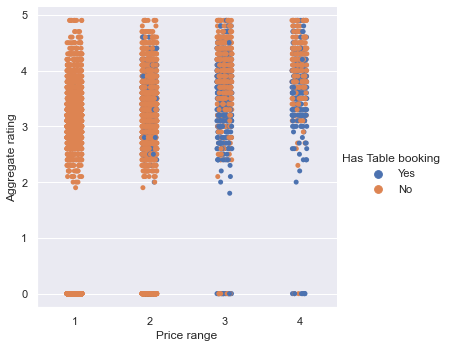

In [424]:
sns.catplot(x="Price range", y="Aggregate rating",hue = "Has Table booking", data=zomatoCSV)

It looks Like price range doesn't affect aggregate rating overly. We also notice a trend where the more exspensive a restaurant is the more likely it offers table booking.

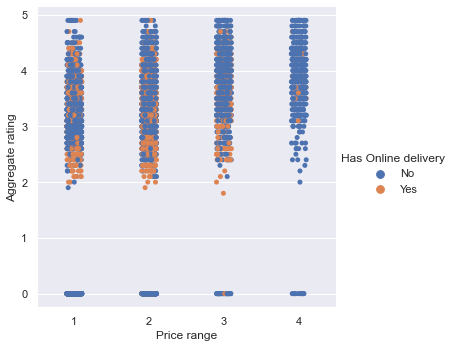

In [425]:
sns.catplot(x="Price range", y="Aggregate rating",hue = "Has Online delivery", data=zomatoCSV)

Here we see that online delivery is offered accross price ranges however lower priced restaurants tend to have online delivery while higher end restaurants do not.

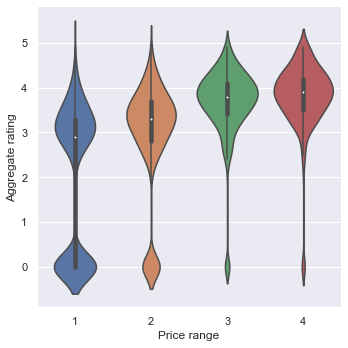

In [418]:
sns.catplot(x="Price range", y="Aggregate rating", data=zomatoCSV, kind = "violin")

It looks like the pricer the restaurant the higher the average rating

## Task 2

## Analysis Pipeline
### Loading Data

In [383]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#

#reading in CSVs (Don't need the json data)
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

#Getting a sense of my data
print(zomatoCSV.head())
print(countryCodesCSV.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Cleaning/Wrangling Data
Immedaitely I can see some very interesting data, but there are a few columns I know I will not be needing. "Zomato uses a 5-point classroom-style grading model, where the distribution of scores in every city is normalized" ([Zomato Blog](https://www.zomato.com/blog/urbanspoon-to-zomato-the-5-point-rating-system-3)). With this in mind, something like rating text or rating color won't be particularily useful since aggregate rating is present. For now I keep votes since which restaurants are so good (or so bad) that they encourage people to vote will be interesting information. Locality verbose and address seems like overkill when I already have so much other location data so we'll drop these columns.

In [384]:
zomatoCSV = zomatoCSV.drop(['Address','Rating color','Rating text', 'Locality Verbose'],axis = 'columns')

It'd be nice to see countrys and cities set up in the indices to see where restaurants are easier. 

In [385]:
cleaned_df = pd.merge(zomatoCSV,countryCodesCSV, how = 'left', on='Country Code')
cleaned_df = cleaned_df.set_index(['Country','City']) \
                       .drop(['Country Code'], axis = 'columns')
cleaned_df.groupby(level=0)['Cuisines_split'].count()

KeyError: 'Column not found: Cuisines_split'

Now it would be useful to see what countries we have in this data set, taking a look at our unique indices we have representation from every continent! 

In [ ]:
list(cleaned_df['Cuisines'].unique())

Missing data is up next, to uniquea sense of what we're dealing wuniquee run the following:

In [ ]:
cleaned_df.isna().any()
#print(cleaned_df['Cuisines'].unique())

No missing data!

## Processing Data

Since price comparison will be an important part of my research question it will be useful to add an *Average Cost for two* column in CAD to allow for easier comparison. The countries in our list and their currencies are as follows:

In [ ]:
#Currencies
print(cleaned_df['Currency'].unique())
#Countries
print(cleaned_df.index.unique(0))

Interestingly, all currencies match their respective country except for the Botswana Pula which is being used for the Phillipines instead of the Philippine Peso. However, this shouldn't matter much since we are converting it to CAD anyways. Since conversion rates are always fluctating we will use the average conversion rate from 2017 - 2020 years provided by the [Bank of Canada](https://www.bankofcanada.ca/rates/exchange/annual-average-exchange-rates/)


In [ ]:
#Reading in the exchange rate data
import json
#data = json.load(open('..\\data\\raw\\FX_RATES_ANNUAL-sd-2017-01-01.json'))
#df_1 = pd.DataFrame(data)
#df_2 = pd.DataFrame(data["observations"])

with open('..\\data\\raw\\FX_RATES_ANNUAL-sd-2017-01-01.json', "r") as read_file:
    dict = json.load(read_file)

df_1 = pd.DataFrame.from_dict(dict['seriesDetail']).T
df_1

In [ ]:
df_2 = pd.DataFrame.from_dict(dict["observations"]).T
df_2